In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import BQPDynamics as bqp
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [4]:
Tc = 1.

ntheta = 20
cutoff = 10.*eil.BCS_ratio*Tc
nw = 80

fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

ntemps = 10
temps = np.linspace(0.9,1.05,ntemps)

gaps = np.zeros((ntemps))
times = np.zeros_like(gaps)

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = False
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Q0(0.8)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gap = sim.calc_eq_gap(gaps[i-1])
        gaps[i] = np.abs(gap)
    else:
        gap = sim.calc_eq_gap()
        gaps[i] = np.abs(gap)
    t1 = time.time()
    times[i] = t1-t0


0
1
2
3
4
5
6
7
8
9


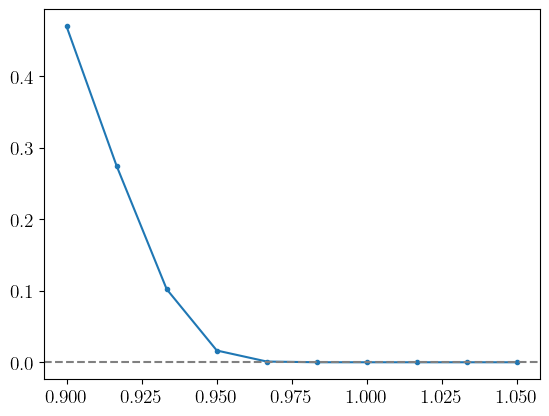

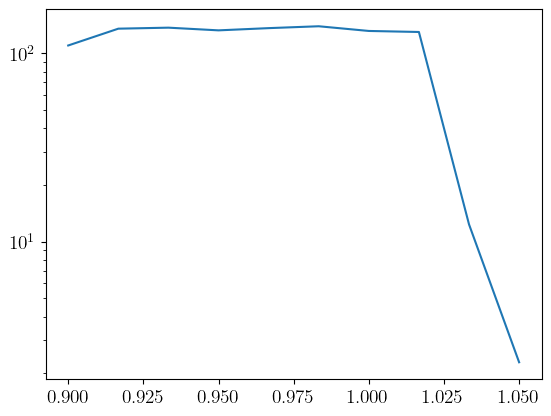

Total time: 18min


In [5]:
plt.plot(temps,gaps[:],marker='.')
plt.axhline(0.,color='gray',linestyle='dashed')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()
print(f"Total time: {np.sum(times)/60.:0.0f}min")

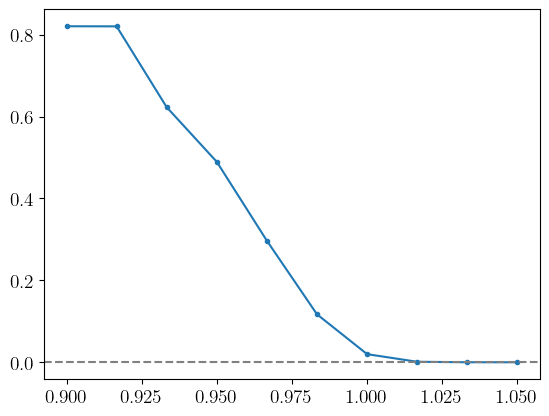

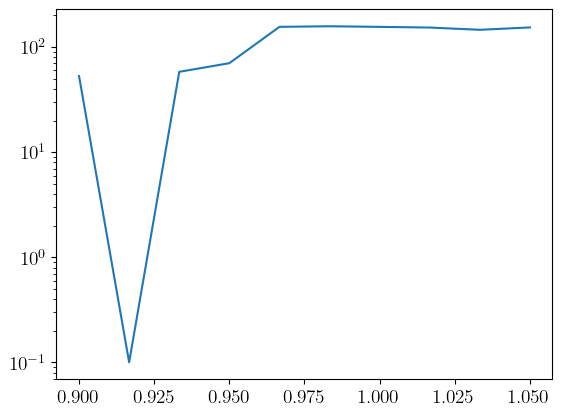

Total time: 18min


In [3]:
plt.plot(temps,gaps[:],marker='.')
plt.axhline(0.,color='gray',linestyle='dashed')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()
print(f"Total time: {np.sum(times)/60.:0.0f}min")

In [2]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100
fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)

nDelta = 10
nQ = 5
t0 = time.time()
sim.precompute_hr(nDelta,nQ)
t1 = time.time()
print(f"{sim.nDelta} x {sim.nQ} grid precomputation of hR: {t1-t0:0.2f}s")

Precompute loop: 0/10 x 0/5
Gap: 0.000
Q: -17.639
Loop: 0, err: 0.010841887346305753
Loop: 1, err: 0.01029978541209358
Loop: 2, err: 0.009784786649030198
Loop: 3, err: 0.009295536466178372
Loop: 4, err: 0.008830747892625185
Loop: 5, err: 0.008389198214885785
Loop: 6, err: 0.007969725779540526
Loop: 7, err: 0.007571226953283613
Loop: 8, err: 0.0071926532328873615
Loop: 9, err: 0.006833008497903301
Loop: 10, err: 0.006491346399235988
Loop: 11, err: 0.0061667678770252745
Loop: 12, err: 0.005858418801567987
Loop: 13, err: 0.005565487731292847
Loop: 14, err: 0.00528720378207828
Loop: 15, err: 0.005022834602464729
Loop: 16, err: 0.0047716844495696315
Loop: 17, err: 0.004533092360754626
Loop: 18, err: 0.004306430416331785
Loop: 19, err: 0.004091102088817452
Loop: 20, err: 0.0038865406744590355
Loop: 21, err: 0.003692207802964948
Loop: 22, err: 0.0035075920215649086
Loop: 23, err: 0.003332207449714921
Loop: 24, err: 0.0031655925009412634
Loop: 25, err: 0.003007308668489018
Loop: 26, err: 0.002

KeyboardInterrupt: 

In [4]:
sim._calc_gr(0.,0.)

The maximum number of iterations allowed has been reached.


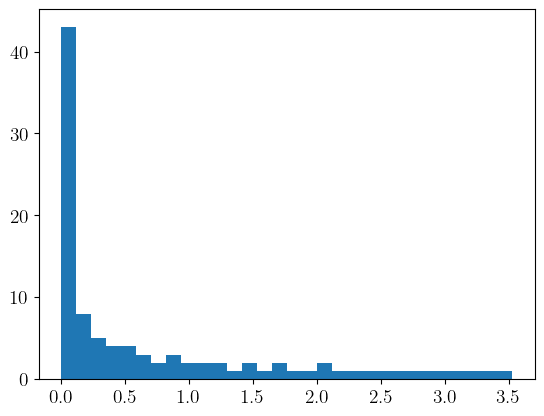

In [19]:
plt.hist(np.abs(sim.Deltas),30)
plt.show()

In [9]:
sim.sigma_r_grid.shape

(2, 2, 301, 50, 100, 50)

In [15]:
print(sim.sigma_r_grid[...,0,0].nbytes/1e6)

0.9632


In [3]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100
fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)


sim.calc_eq_gap(1.)

Loop: 0, err: 0.049928642693336044
Loop: 1, err: 0.047423021959325434
Loop: 2, err: 0.04504332302987056
Loop: 3, err: 0.042783224102969954
Loop: 4, err: 0.04063671666882498
Loop: 5, err: 0.03859809088409388
Loop: 6, err: 0.03666192146556957
Loop: 7, err: 0.034823054113879655
Loop: 8, err: 0.033076592471437134
Loop: 9, err: 0.031417885613712594
Loop: 10, err: 0.029842516068751386
Loop: 11, err: 0.028346288356571606
Loop: 12, err: 0.026925218037499605
Loop: 13, err: 0.025575521256524746
Loop: 14, err: 0.02429360476927122
Loop: 15, err: 0.023076056434114645
Loop: 16, err: 0.021919636154242413
Loop: 17, err: 0.020821267253003733
Loop: 18, err: 0.019778028265672286
Loop: 19, err: 0.01878714513070578
Loop: 20, err: 0.017845983763694284
Loop: 21, err: 0.016952042997417864
Loop: 22, err: 0.016102947871752118
Loop: 23, err: 0.015296443257552273
Loop: 24, err: 0.014530387799090941
Loop: 25, err: 0.01380274816010821
Loop: 26, err: 0.01311159355904569
Loop: 27, err: 0.012455090579563692
Loop: 28, 

(1.730481814713204+0.3648147231001938j)